In [1]:
import czsc
czsc.set_url_token(token="qCfHxwHchMb8pHif3jYy3rrAQhdXzhTA", url="http://zbczsc.com:9106")  # 初始化自建的数据客户端，并设置缓存路径
URL="http://zbczsc.com:9106"  # tushare数据服务URL
CACHE_PATH=".quant_data_cache_zbczsc"  # 缓存路径
from datetime import datetime
date = datetime.now().strftime('%Y%m%d')
dc = czsc.DataClient(url=URL, cache_path=CACHE_PATH)      
df_cashflow = dc.cashflow_vip(ann_date=date,v="ts") 
import pandas as pd

2024-10-08 19:13:54.155 | INFO     | czsc.utils.data_client:set_url_token:23 - http://zbczsc.com:9106 数据访问凭证码已保存到 C:\Users\Bob.Fu\58d6c64cee56edba240e3e97f5b44bb1.txt
2024-10-08 19:13:54.155 | INFO     | czsc.utils.data_client:get_url_token:32 - 从 C:\Users\Bob.Fu\58d6c64cee56edba240e3e97f5b44bb1.txt 读取 http://zbczsc.com:9106 的访问凭证码
2024-10-08 19:13:54.171 | INFO     | czsc.utils.data_client:__init__:68 - 数据URL: http://zbczsc.com:9106 数据缓存路径：.quant_data_cache_zbczsc 占用磁盘空间：2.85 MB
2024-10-08 19:13:55.412 | INFO     | czsc.utils.data_client:post_request:121 - 本次获取数据总耗时：1.24秒；API：cashflow_vip；参数：{'ann_date': '20241008', 'v': 'ts'}；数据量：(0, 97)


# 股票研究

## 破净成份股

In [2]:
# 获取指数成份股
indexs = dc.index_dailybasic(trade_date = date,
    v="ts")

stocks = []
for sec in indexs['ts_code']:
    sec_item = dc.index_weight(index_code=sec, start_date='20240801', end_date="20240830", #trade_date='20240926', 
                                v="ts")
    stocks.append(sec_item)
stocks_df = pd.concat(stocks)
con_codes = stocks_df['con_code'].drop_duplicates(keep=False)

# 获取破净成份股
# sec_pb_list = []
# for sec in con_codes:
d = dc.daily_basic(
    # ts_code=sec,
    trade_date=date,
    v='ts')

df_pd_less_1 = d[d['pb'] < 1]
chengfengu_pd_less_1 = df_pd_less_1[df_pd_less_1['ts_code'].isin(con_codes)]

2024-10-08 19:13:56.172 | INFO     | czsc.utils.data_client:post_request:121 - 本次获取数据总耗时：0.74秒；API：index_dailybasic；参数：{'trade_date': '20241008', 'v': 'ts'}；数据量：(12, 12)
2024-10-08 19:13:56.181 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：index_weight；参数：{'index_code': '000001.SH', 'start_date': '20240801', 'end_date': '20240830', 'v': 'ts'}；数据量：(2223, 4)
2024-10-08 19:13:56.185 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：index_weight；参数：{'index_code': '000005.SH', 'start_date': '20240801', 'end_date': '20240830', 'v': 'ts'}；数据量：(171, 4)
2024-10-08 19:13:56.189 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：index_weight；参数：{'index_code': '000006.SH', 'start_date': '20240801', 'end_date': '20240830', 'v': 'ts'}；数据量：(24, 4)
2024-10-08 19:13:56.190 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：index_weight；参数：{'index_code': '000016.SH', 'start_date': '20240801', 'end_date': '20240830', 'v': 'ts'}；数据量：(50, 4)

# 可转债研究

## 可转债价值回归分析

In [3]:
# import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

In [4]:

cb_basic = dc.cb_basic(v='ts')
cb_basic = cb_basic[cb_basic['maturity_date']>'2024-12-31']

2024-10-08 19:13:59.069 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：cb_basic；参数：{'v': 'ts'}；数据量：(1023, 26)


In [5]:
lastday = '20240930'
closes = dc.daily(trade_date=lastday, v='ts').loc[:,['ts_code','close']]#获取正股收盘价
basic=dc.cb_basic(v='ts').loc[:,['ts_code','stk_code','conv_price', 'stk_short_name']]#基本面，获取正股代码，转股价
price_zz=dc.cb_daily(trade_date='20240930', v='ts').loc[:,['ts_code','close']]#获取转债现价
price_zz.columns=['ts_code','现价']
price_zz=price_zz.merge(basic)
price_zz=price_zz.merge(closes,left_on='stk_code',right_on='ts_code')
price_zz['转股价值']=price_zz['close']/price_zz['conv_price']*100#获取转股价值=正股收盘价/转股价*100
df_cb = price_zz.loc[:,['ts_code_x' ,'现价' ,'转股价值','stk_code', 'stk_short_name']].set_index('ts_code_x').sort_values(by='转股价值')

2024-10-08 19:13:59.099 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：daily；参数：{'trade_date': '20240930', 'v': 'ts'}；数据量：(5344, 11)
2024-10-08 19:13:59.103 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：cb_basic；参数：{'v': 'ts'}；数据量：(1023, 26)
2024-10-08 19:13:59.113 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：cb_daily；参数：{'trade_date': '20240930', 'v': 'ts'}；数据量：(536, 11)


In [6]:
df_cb['转股价值率'] = df_cb['转股价值']/df_cb['现价']

In [7]:
df_cb.sort_values(by='转股价值率',ascending= False)
df_cb

,现价,转股价值,stk_code,stk_short_name,转股价值率
ts_code_x,,,,,
113575.SH,172.391,12.427984,603377.SH,ST东时,0.072092
113589.SH,209.065,24.572823,603608.SH,*ST天创,0.117537
118020.SH,72.952,26.999463,688148.SH,芳源股份,0.370099
118005.SH,100.192,27.204030,688116.SH,天奈科技,0.271519
123093.SZ,116.000,28.349037,300651.SZ,金陵体育,0.244388
118000.SH,97.956,28.677173,688388.SH,嘉元科技,0.292756
118027.SH,73.141,28.850429,688066.SH,航天宏图,0.394449
113633.SH,105.741,28.960018,603486.SH,科沃斯,0.273877
118010.SH,97.881,29.196168,688026.SH,洁特生物,0.298282


In [8]:
poly2=np.polyfit(df_cb['转股价值'].values, df_cb['现价'].values,2)  # 二次函数拟合

In [9]:
df_cb['预测值']=np.polyval(poly2,df_cb['转股价值'].values)

Text(0, 0.5, 'bond price')

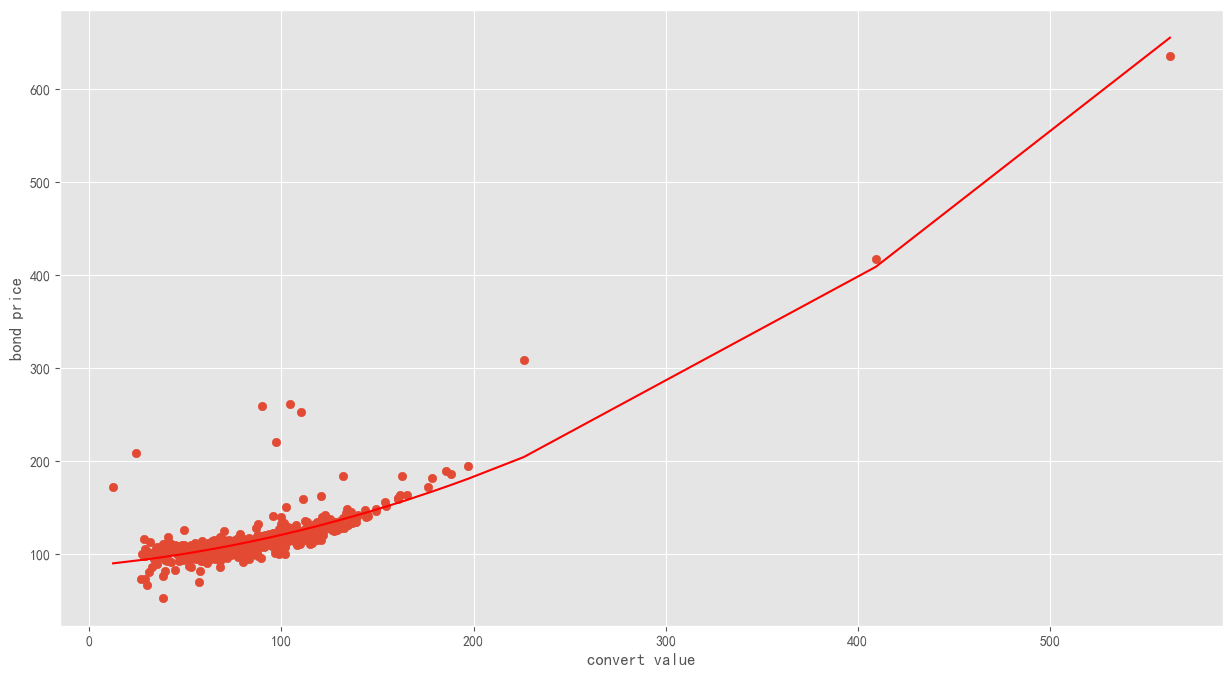

In [10]:
fig,ax=plt.subplots(1,figsize=(15,8))
plt.scatter(df_cb['转股价值'].values,df_cb['现价'].values)
plt.plot(df_cb['转股价值'].values,df_cb['预测值'].values,'-',c='r')
plt.xlabel('convert value')
plt.ylabel('bond price')

In [11]:
# 股票基本信息
stk_basic = dc.daily_basic(trade_date=lastday)

2024-10-08 19:13:59.697 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：daily_basic；参数：{'trade_date': '20240930'}；数据量：(5344, 18)


In [12]:
stk_basic['stk_code']=stk_basic['code']
df_cb = df_cb.merge(stk_basic,on='stk_code')


In [13]:
df_cb = df_cb[(df_cb['pe_ttm']>0) & (df_cb['pe_ttm']<100)]

In [14]:
df_cb = df_cb[df_cb['现价']<125]

In [15]:
df_cb.sort_values(by='转股价值率', ascending=False)

,现价,转股价值,stk_code,stk_short_name,转股价值率,预测值,dt,code,circ_mv,close,dv_ratio,dv_ttm,float_share,free_share,pb,pe,pe_ttm,ps,ps_ttm,total_mv,total_share,turnover_rate,turnover_rate_f,volume_ratio
470,114.724,120.779221,600567.SH,山鹰国际,1.052781,131.151457,2024-09-30,600567.SH,8.315268e+05,1.86,0.0000,0.5547,4.470574e+05,2.896602e+05,0.6322,53.2255,15.3740,0.2835,0.2787,8.315268e+05,4.470574e+05,4.3489,6.7120,2.88
363,99.660,102.008734,301216.SZ,万凯新材,1.023567,121.539661,2024-09-30,301216.SZ,3.325259e+05,11.68,1.7123,1.2729,2.846968e+04,2.442230e+04,1.0646,13.7823,46.3734,0.3432,0.3411,6.016287e+05,5.150931e+04,5.7732,6.7299,4.35
485,124.700,127.524752,301062.SZ,上海艾录,1.022652,134.858102,2024-09-30,301062.SZ,3.584161e+05,12.88,0.3106,0.3882,2.782734e+04,2.445975e+04,4.3141,68.5061,55.0845,4.8353,4.5114,5.157098e+05,4.003958e+04,8.7571,9.9628,3.39
473,119.893,121.490468,601998.SH,中信银行,1.013324,131.535989,2024-09-30,601998.SH,2.704091e+07,7.01,4.1470,4.6519,3.857477e+06,3.162468e+05,0.5746,5.5917,5.6403,1.8200,1.7952,3.747331e+07,5.345693e+06,0.4237,5.1683,2.37
402,109.501,108.333333,300948.SZ,冠中生态,0.989336,124.662837,2024-09-30,300948.SZ,1.479268e+05,11.31,0.4421,0.5246,1.307929e+04,6.966738e+03,1.8542,46.3418,87.3543,4.2003,5.6627,1.583597e+05,1.400174e+04,9.4126,17.6712,1.96
466,121.606,120.307167,600926.SH,杭州银行,0.989319,130.897062,2024-09-30,600926.SH,7.561472e+06,14.10,2.8369,3.6879,5.362746e+05,2.996160e+05,0.8320,5.8135,5.2086,2.3880,2.3227,8.361704e+06,5.930287e+05,1.5174,2.7160,2.29
453,118.758,117.465753,601006.SH,大秦铁路,0.989119,129.379607,2024-09-30,601006.SH,1.245203e+07,6.86,5.8466,5.5644,1.815165e+06,8.830888e+05,0.8696,10.4376,12.1413,1.5369,1.6133,1.245203e+07,1.815165e+06,1.8160,3.7327,3.14
408,111.195,109.685230,002839.SZ,张家港行,0.986422,125.345644,2024-09-30,002839.SZ,9.388152e+05,4.53,4.4150,4.4150,2.072440e+05,1.562586e+05,0.6506,5.5003,5.2633,2.1644,2.0839,9.828537e+05,2.169655e+05,4.3362,5.7510,2.13
459,120.578,118.343195,601686.SH,友发集团,0.981466,129.845676,2024-09-30,601686.SH,8.574293e+05,6.00,2.4963,4.9180,1.429049e+05,6.775862e+04,1.3862,15.0481,24.8689,0.1408,0.1514,8.575493e+05,1.429249e+05,0.8392,1.7699,4.36
441,118.500,115.169367,300793.SZ,佳禾智能,0.971893,128.170528,2024-09-30,300793.SZ,5.160110e+05,15.64,0.9591,0.9477,3.299303e+04,2.215303e+04,2.1887,39.8986,65.6889,2.2262,2.2333,5.292401e+05,3.383888e+04,11.4731,17.0871,2.31


## 可转债轮动

In [16]:
cb_rate = dc.cb_rate(ts_code=['123157.SZ'], fields=['ts_code', 'coupon_rate', 'rate_freq'], v='ts')
cb_rate

2024-10-08 19:14:00.113 | INFO     | czsc.utils.data_client:post_request:107 - 缓存命中 | API：cb_rate；参数：{'ts_code': ['123157.SZ'], 'v': 'ts'}；数据量：(0, 3)


,ts_code,rate_freq,coupon_rate
